# Predicting Hotel Cancellations

## Problem Statement: <br>
As a data scientist, you are supporting a hotel with a project aimed at increasing revenue from their room bookings. They believe that they can use data science to help them reduce the number of cancellations. You are to use any appropriate methodology to identify what contributes to whether a booking will be fulfilled or canceled. The results of your work will be used to reduce the chance someone cancels their booking.

## Goal: <br>
    1.To develop/build a system/web app that predicts whether a hotel booking will be fulfilled or canceled.
    2.To determine the factors with high importance in predicting whether a hotel booking will be fulfilled or canceled.

### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import xgboost
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report, ConfusionMatrixDisplay

from sklearn.model_selection import RandomizedSearchCV


### Loading the data

In [2]:
df = pd.read_csv("hotel_bookings.csv")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not_Canceled
1,INN00002,2.0,0.0,2.0,3.0,Not Selected,0.0,Room_Type 1,5.0,2018.0,11.0,6.0,Online,0.0,0.0,0.0,106.68,1.0,Not_Canceled
2,INN00003,1.0,0.0,2.0,1.0,Meal Plan 1,0.0,Room_Type 1,1.0,2018.0,2.0,28.0,Online,0.0,0.0,0.0,60.00,0.0,Canceled
3,INN00004,2.0,0.0,0.0,2.0,Meal Plan 1,0.0,Room_Type 1,211.0,2018.0,5.0,20.0,Online,0.0,0.0,0.0,100.00,0.0,Canceled
4,INN00005,2.0,0.0,1.0,1.0,Not Selected,0.0,Room_Type 1,48.0,2018.0,4.0,11.0,Online,0.0,0.0,0.0,94.50,0.0,Canceled


In [3]:
df.shape

(36275, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          35862 non-null  float64
 2   no_of_children                        35951 non-null  float64
 3   no_of_weekend_nights                  35908 non-null  float64
 4   no_of_week_nights                     35468 non-null  float64
 5   type_of_meal_plan                     35749 non-null  object 
 6   required_car_parking_space            33683 non-null  float64
 7   room_type_reserved                    35104 non-null  object 
 8   lead_time                             35803 non-null  float64
 9   arrival_year                          35897 non-null  float64
 10  arrival_month                         35771 non-null  float64
 11  arrival_date   

### Data cleaning and validation

In [5]:
df.isna().sum()

Booking_ID                                 0
no_of_adults                             413
no_of_children                           324
no_of_weekend_nights                     367
no_of_week_nights                        807
type_of_meal_plan                        526
required_car_parking_space              2592
room_type_reserved                      1171
lead_time                                472
arrival_year                             378
arrival_month                            504
arrival_date                             981
market_segment_type                     1512
repeated_guest                           586
no_of_previous_cancellations             497
no_of_previous_bookings_not_canceled     550
avg_price_per_room                       460
no_of_special_requests                   789
booking_status                             0
dtype: int64

In [6]:
df = df.dropna(axis=0)

In [7]:
df.shape

(27511, 19)

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,27511.000000,27511.000000,27511.000000,27511.000000,27511.000000,27511.000000,27511.000000,27511.000000,27511.000000,27511.000000,27511.000000,27511.000000,27511.000000,27511.000000
mean,1.845153,0.105558,0.813347,2.203119,0.031188,85.286467,2017.821162,7.423540,15.584675,0.026171,0.024790,0.163571,103.538728,0.619607
std,0.517605,0.407020,0.870882,1.407811,0.173827,86.098013,0.383223,3.063279,8.732747,0.159648,0.381654,1.872857,35.217580,0.784811
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.750000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,127.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.280000,1.000000
max,4.000000,10.000000,6.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [10]:
df['arrival_year'].value_counts()

2018.0    22591
2017.0     4920
Name: arrival_year, dtype: int64

the dataset only cover two years - 2017 and 2018

### Exploratory Data Analysis

#### Univariate Analysis

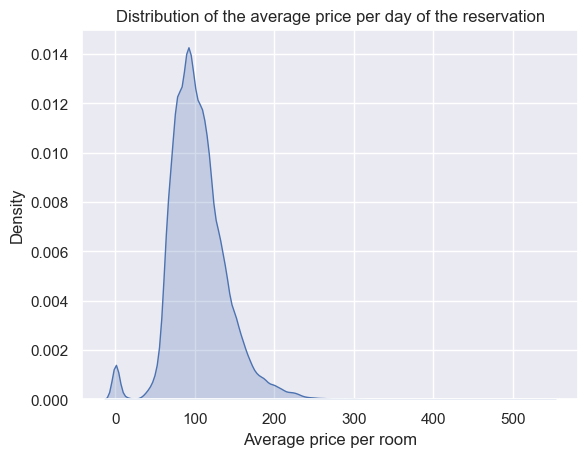

In [11]:
sns.kdeplot(df['avg_price_per_room'], fill=True)
plt.xlabel('Average price per room')
plt.title('Distribution of the average price per day of the reservation')

plt.savefig('price.png', bbox_inches='tight', dpi=300)
plt.show()

the distribution is approximately right skewed as most of the prices are kind of betwwen 50-200. This is kind of okay since the variable is calculated per day.

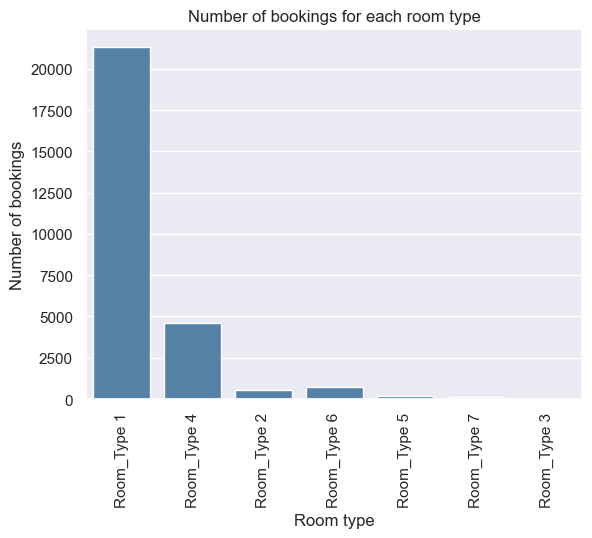

In [12]:
sns.countplot(x='room_type_reserved',data=df, color='steelblue')
plt.xticks(rotation=90)
plt.ylabel('Number of bookings')
plt.xlabel('Room type')
plt.title('Number of bookings for each room type')

plt.savefig('roomtype.png', bbox_inches='tight', dpi=300)
plt.show()

the *room_type 1* has the highest number of bookings with over 20000 bookings.

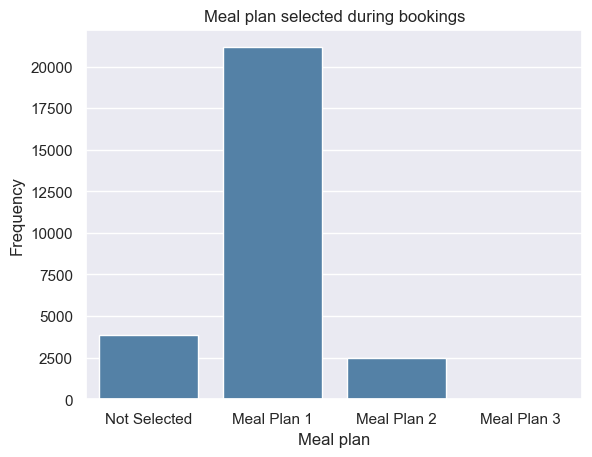

In [13]:
sns.countplot(x='type_of_meal_plan', data=df, color='steelblue')
plt.xlabel('Meal plan')
plt.ylabel('Frequency')
plt.title('Meal plan selected during bookings')

plt.savefig('meal.png', bbox_inches='tight', dpi=300)
plt.show()

the *meal plan 1* was mostly selected during bookings. <br>
N.B.; the *not selected* was not filtered out because it's possible to not select a meal plan when making a booking.

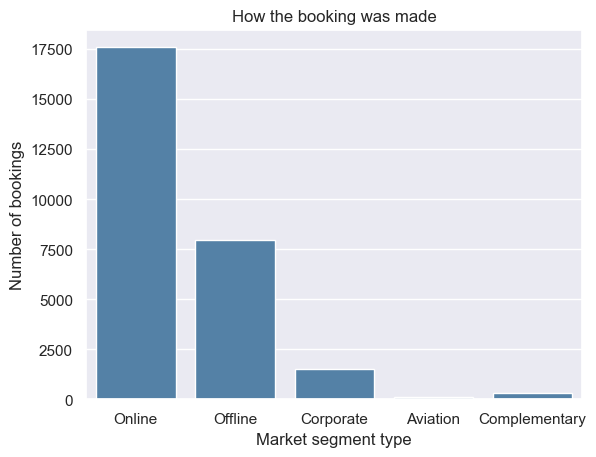

In [14]:
sns.countplot(x='market_segment_type', data=df, color='steelblue')
plt.xlabel('Market segment type')
plt.ylabel('Number of bookings')
plt.title('How the booking was made')

plt.savefig('market.png', bbox_inches='tight', dpi=300)
plt.show()

Most bookings were made online, least is avaiation medium.

In [15]:
car_space_yes = df['required_car_parking_space'].sum()
required_car_space = ['Yes', 'No']
data = [car_space_yes, (len(df)-car_space_yes)]
data

[858.0, 26653.0]

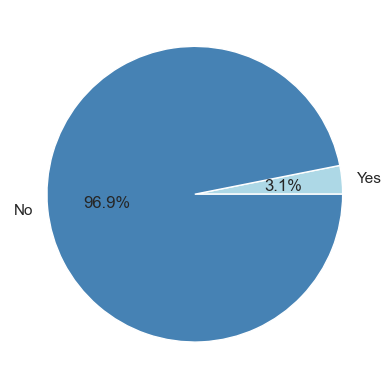

In [16]:
plt.pie(data, labels=required_car_space, autopct='%1.1f%%', colors=['Lightblue', 'Steelblue'])


plt.savefig('car.png', bbox_inches='tight', dpi=300)
plt.show()

96.9% indicated no need for car parking space, while 3.1% indicated need for car parking space.

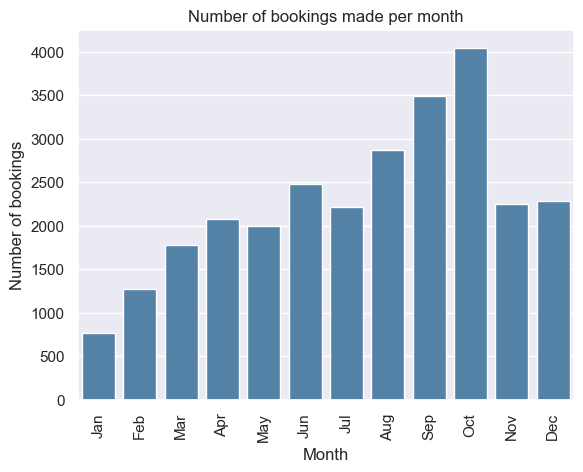

In [17]:
sns.countplot(x='arrival_month', data=df, color='Steelblue')
plt.xlabel('Month')
plt.ylabel('Number of bookings')
plt.title('Number of bookings made per month')
x = range(0, 12)
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(x, labels, rotation=90)

plt.savefig('month.png', bbox_inches='tight', dpi=300)
plt.show()

October has the highest number of bookings with over 4000 bookings made, while the January has the least amount number of bookings.

#### Bivariate Analysis

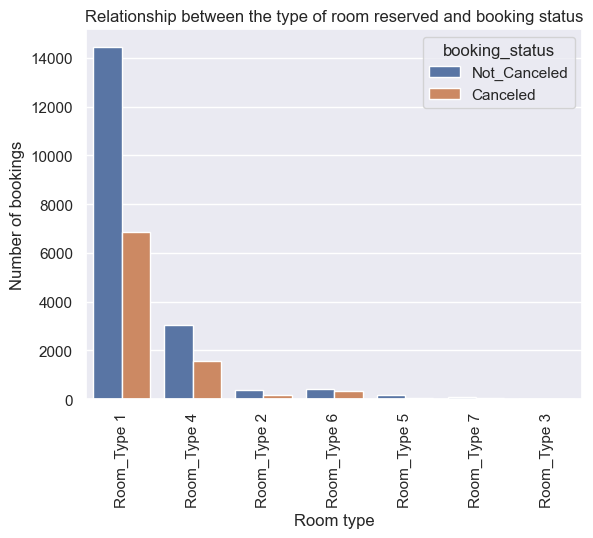

In [18]:
sns.countplot(x='room_type_reserved', hue='booking_status', data=df)
plt.xticks(rotation=90)
plt.ylabel('Number of bookings')
plt.xlabel('Room type')
plt.title('Relationship between the type of room reserved and booking status')

plt.savefig('roomvstatus.png', bbox_inches='tight', dpi=300)
plt.show()

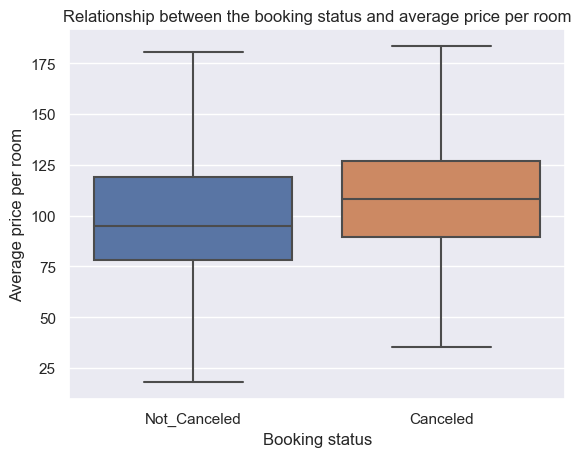

In [19]:
sns.boxplot(x='booking_status', y='avg_price_per_room', data=df, sym='')
plt.xlabel('Booking status')
plt.ylabel('Average price per room')
plt.title('Relationship between the booking status and average price per room')


plt.savefig('pricevstatus.png', bbox_inches='tight', dpi=300)
plt.show()

there is no much observable relationship between the average price per day for a room and the booking status

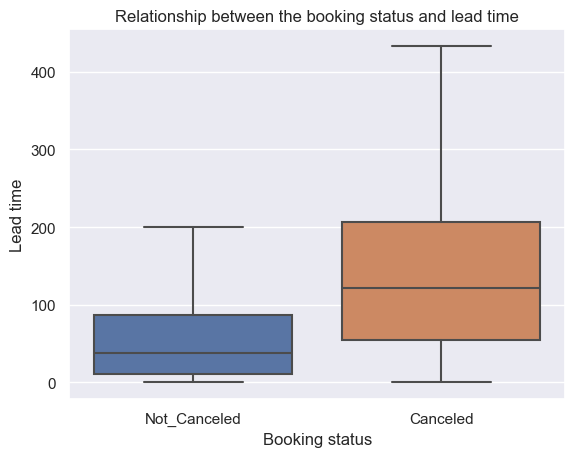

In [20]:
sns.boxplot(x='booking_status', y='lead_time', data=df, sym='')
plt.xlabel('Booking status')
plt.ylabel('Lead time')
plt.title('Relationship between the booking status and lead time')

plt.savefig('leadvstatus.png', bbox_inches='tight', dpi=300)
plt.show()

there is an observable difference as canceled bookings have more lead time than bookings that were not canceled.

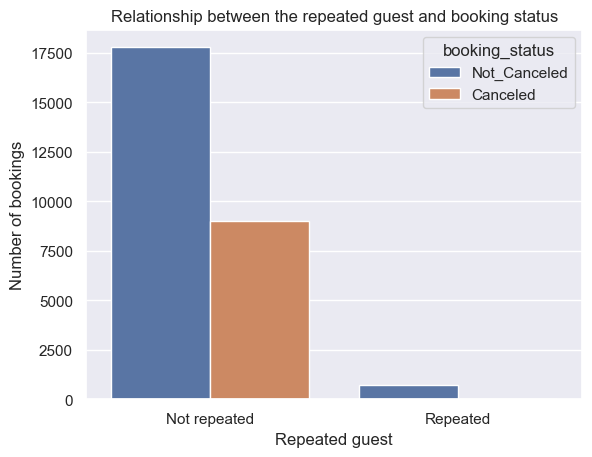

In [21]:
sns.countplot(x='repeated_guest',hue='booking_status', data=df)
plt.ylabel('Number of bookings')
plt.xlabel('Repeated guest')
plt.title('Relationship between the repeated guest and booking status')
x = range(2)
labels = ['Not repeated', 'Repeated']
plt.xticks(x, labels)


plt.savefig('repeatedvstatus.png', bbox_inches='tight', dpi=300)
plt.show()

In [22]:
df.groupby(['repeated_guest','booking_status'])[['booking_status']].count()

booking_status
repeated_guest booking_status                
0.0            Canceled                  9000
               Not_Canceled             17791
1.0            Canceled                    10
               Not_Canceled               710

In [23]:
df['no_of_previous_cancellations'].value_counts()

0.0     27243
1.0       158
2.0        33
3.0        32
11.0       19
5.0        11
4.0        10
13.0        4
6.0         1
Name: no_of_previous_cancellations, dtype: int64

### Feature preprocessing

_make a copy of the dataset_

In [24]:
model_data = df.copy()

In [25]:
model_data.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

#### Feature engineering

In [26]:
model_data['no_of_individuals'] = model_data['no_of_adults'] + model_data['no_of_children']

In [27]:
model_data['no_of_days_booked'] = model_data['no_of_weekend_nights'] + model_data['no_of_week_nights']

engineered new columns to the data

In [28]:
model_data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,no_of_individuals,no_of_days_booked
1,INN00002,2.0,0.0,2.0,3.0,Not Selected,0.0,Room_Type 1,5.0,2018.0,...,6.0,Online,0.0,0.0,0.0,106.68,1.0,Not_Canceled,2.0,5.0
2,INN00003,1.0,0.0,2.0,1.0,Meal Plan 1,0.0,Room_Type 1,1.0,2018.0,...,28.0,Online,0.0,0.0,0.0,60.00,0.0,Canceled,1.0,3.0
3,INN00004,2.0,0.0,0.0,2.0,Meal Plan 1,0.0,Room_Type 1,211.0,2018.0,...,20.0,Online,0.0,0.0,0.0,100.00,0.0,Canceled,2.0,2.0
4,INN00005,2.0,0.0,1.0,1.0,Not Selected,0.0,Room_Type 1,48.0,2018.0,...,11.0,Online,0.0,0.0,0.0,94.50,0.0,Canceled,2.0,2.0
5,INN00006,2.0,0.0,0.0,2.0,Meal Plan 2,0.0,Room_Type 1,346.0,2018.0,...,13.0,Online,0.0,0.0,0.0,115.00,1.0,Canceled,2.0,2.0


#### Feature encoding

In [29]:
cat_features = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']

In [30]:
lab = LabelEncoder()
for col in cat_features:
    model_data[col] = lab.fit_transform(model_data[col])

In [31]:
model_data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,no_of_individuals,no_of_days_booked
1,INN00002,2.0,0.0,2.0,3.0,3,0.0,0,5.0,2018.0,...,6.0,4,0.0,0.0,0.0,106.68,1.0,Not_Canceled,2.0,5.0
2,INN00003,1.0,0.0,2.0,1.0,0,0.0,0,1.0,2018.0,...,28.0,4,0.0,0.0,0.0,60.00,0.0,Canceled,1.0,3.0
3,INN00004,2.0,0.0,0.0,2.0,0,0.0,0,211.0,2018.0,...,20.0,4,0.0,0.0,0.0,100.00,0.0,Canceled,2.0,2.0
4,INN00005,2.0,0.0,1.0,1.0,3,0.0,0,48.0,2018.0,...,11.0,4,0.0,0.0,0.0,94.50,0.0,Canceled,2.0,2.0
5,INN00006,2.0,0.0,0.0,2.0,1,0.0,0,346.0,2018.0,...,13.0,4,0.0,0.0,0.0,115.00,1.0,Canceled,2.0,2.0


In [32]:
model_data['market_segment_type'].value_counts()

4    17599
3     7982
2     1530
1      299
0      101
Name: market_segment_type, dtype: int64

In [33]:
df['arrival_year'].value_counts()

2018.0    22591
2017.0     4920
Name: arrival_year, dtype: int64

In [34]:
model_data['booking_status'] = model_data['booking_status'].replace({'Canceled':0, 'Not_Canceled':1})

In [35]:
model_data['booking_status'].value_counts()

1    18501
0     9010
Name: booking_status, dtype: int64

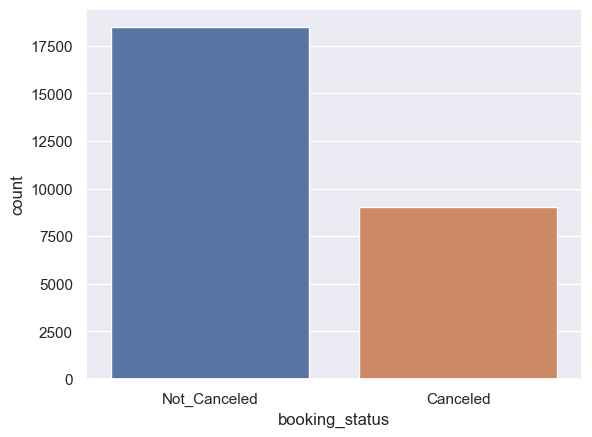

In [75]:
sns.countplot(x='booking_status', data=df)

plt.savefig('class.png', bbox_inches='tight', dpi=300)
plt.show()

#### Feature correlation

In [37]:
features = model_data.drop(['Booking_ID', 'booking_status'], axis=1)
features.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,no_of_individuals,no_of_days_booked
1,2.0,0.0,2.0,3.0,3,0.0,0,5.0,2018.0,11.0,6.0,4,0.0,0.0,0.0,106.68,1.0,2.0,5.0
2,1.0,0.0,2.0,1.0,0,0.0,0,1.0,2018.0,2.0,28.0,4,0.0,0.0,0.0,60.00,0.0,1.0,3.0
3,2.0,0.0,0.0,2.0,0,0.0,0,211.0,2018.0,5.0,20.0,4,0.0,0.0,0.0,100.00,0.0,2.0,2.0
4,2.0,0.0,1.0,1.0,3,0.0,0,48.0,2018.0,4.0,11.0,4,0.0,0.0,0.0,94.50,0.0,2.0,2.0
5,2.0,0.0,0.0,2.0,1,0.0,0,346.0,2018.0,9.0,13.0,4,0.0,0.0,0.0,115.00,1.0,2.0,2.0


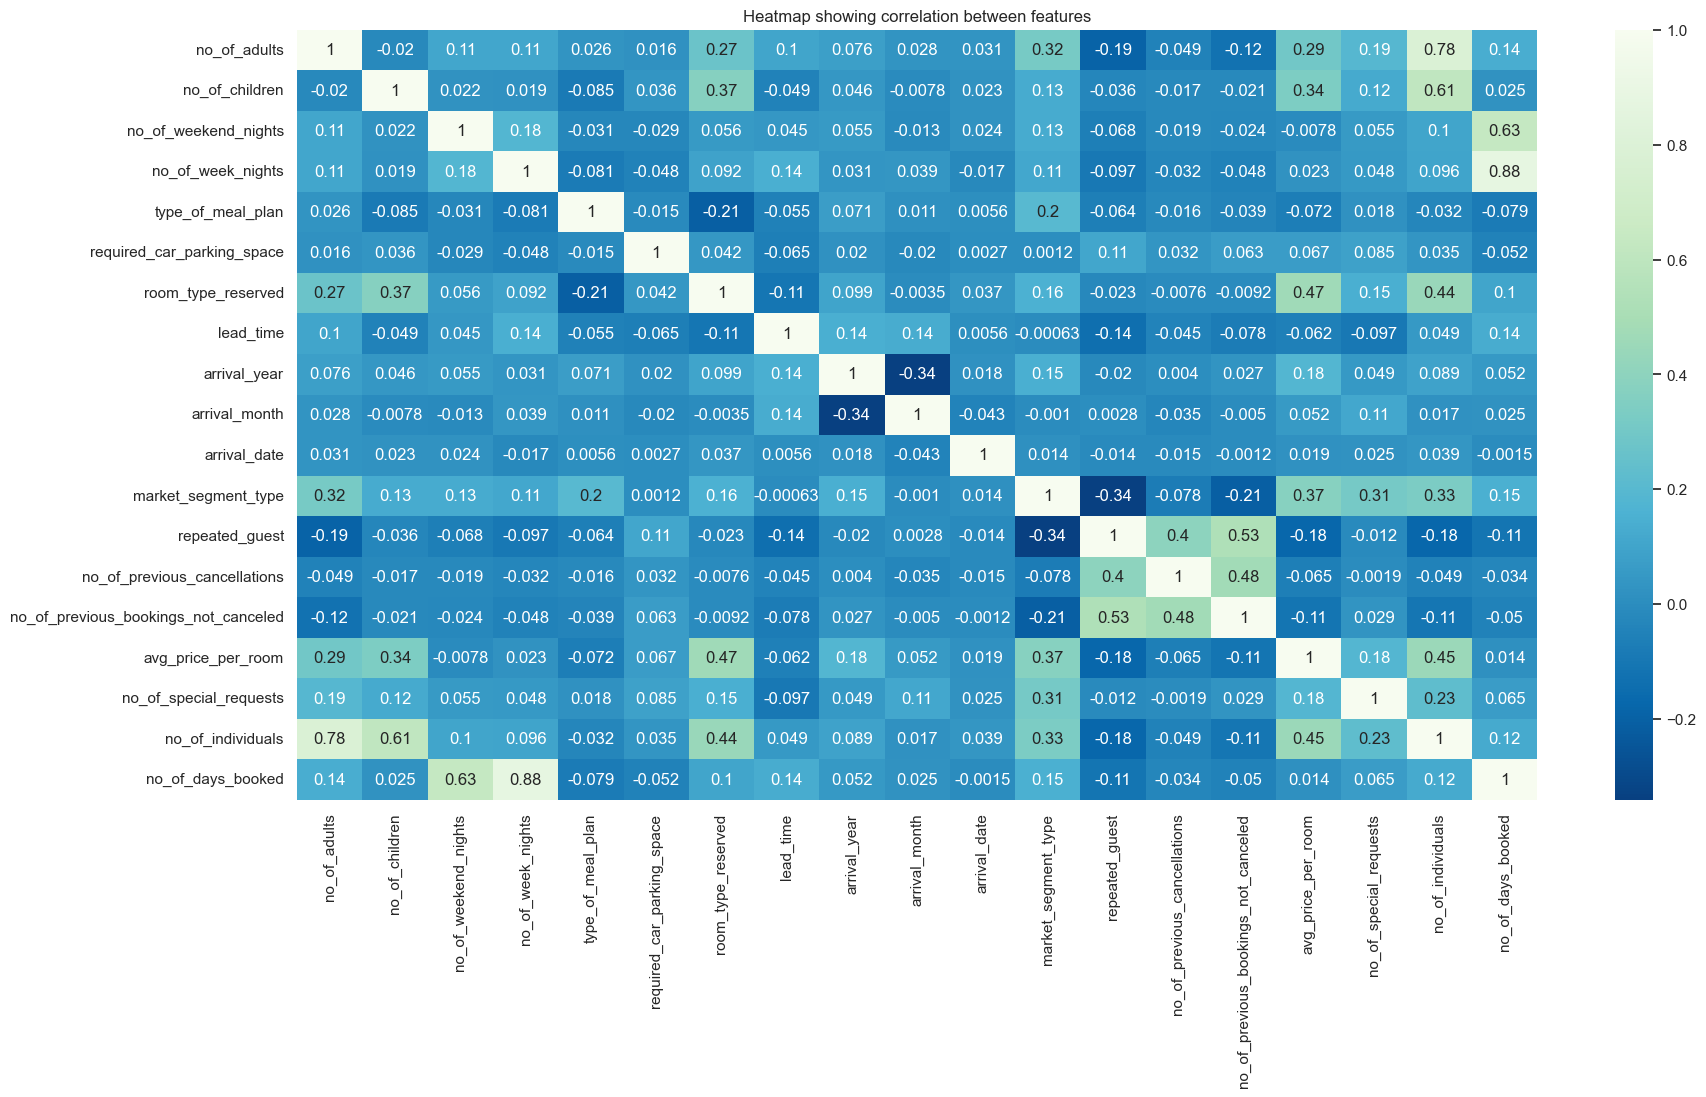

In [38]:
plt.figure(figsize=(20,10))
sns.heatmap(features.corr(), annot=True, cmap='GnBu_r')
plt.title('Heatmap showing correlation between features')

plt.savefig('corr.png', bbox_inches='tight', dpi=300)
plt.show()

### Train-test split validation

In [39]:
X = features
y = model_data['booking_status']

In [40]:
print(X.shape, y.shape)

(27511, 19) (27511,)


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(22008, 19) (5503, 19) (22008,) (5503,)


### Feature scaling

In [43]:
scaler = StandardScaler()
scaledX_train = scaler.fit_transform(X_train)
scaledX_test = scaler.transform(X_test)

### Modelling

In [44]:
f1scores = []

#### Logistic Regression

In [45]:
logit = LogisticRegression()
logit.fit(scaledX_train, y_train)

LogisticRegression()

In [46]:
pred_logit = logit.predict(scaledX_test)
pred_logit

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [47]:
print(f'The accuracy score of the logistic regression model is {accuracy_score(y_test, pred_logit)}')

The accuracy score of the logistic regression model is 0.7953843358168272


In [48]:
print(f'The f1_score of the logistic regression model is {f1_score(y_test, pred_logit)}')
f1scores.append(f1_score(y_test, pred_logit))

The f1_score of the logistic regression model is 0.8552327076369248


In [49]:
print(classification_report(y_test, pred_logit))

              precision    recall  f1-score   support

           0       0.73      0.59      0.65      1786
           1       0.82      0.89      0.86      3717

    accuracy                           0.80      5503
   macro avg       0.77      0.74      0.75      5503
weighted avg       0.79      0.80      0.79      5503



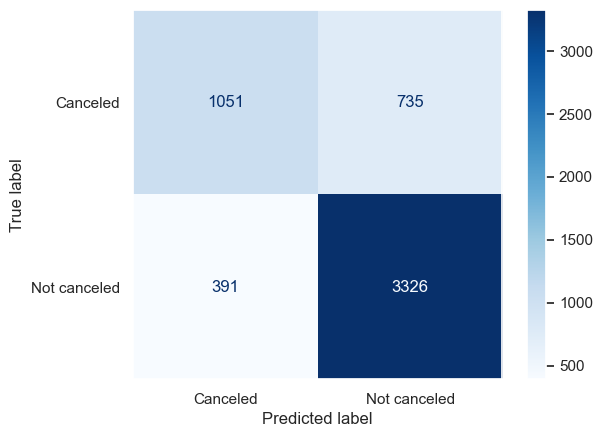

In [50]:
confusion_matrix_log = confusion_matrix(y_test, pred_logit)
cm_display_log = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_log, display_labels = ['Canceled', 'Not canceled'])
cm_display_log.plot(cmap=plt.cm.Blues)
plt.grid(False)

plt.savefig('logcm.png', bbox_inches='tight', dpi=300)
plt.show()

#### Random forest

In [51]:
forest = RandomForestClassifier(random_state = 1)
forest.fit(scaledX_train, y_train)

RandomForestClassifier(random_state=1)

In [52]:
pred_forest = forest.predict(scaledX_test)
pred_forest

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [53]:
print(f'The accuracy score of the random forest model is {accuracy_score(y_test, pred_forest)}')

The accuracy score of the random forest model is 0.8984190441577321


In [54]:
print(f'The f1_score of the random forest model is {f1_score(y_test, pred_forest)}')
f1scores.append(f1_score(y_test, pred_forest))

The f1_score of the random forest model is 0.9264763908983297


In [55]:
print(classification_report(y_test, pred_forest))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1786
           1       0.91      0.95      0.93      3717

    accuracy                           0.90      5503
   macro avg       0.89      0.87      0.88      5503
weighted avg       0.90      0.90      0.90      5503



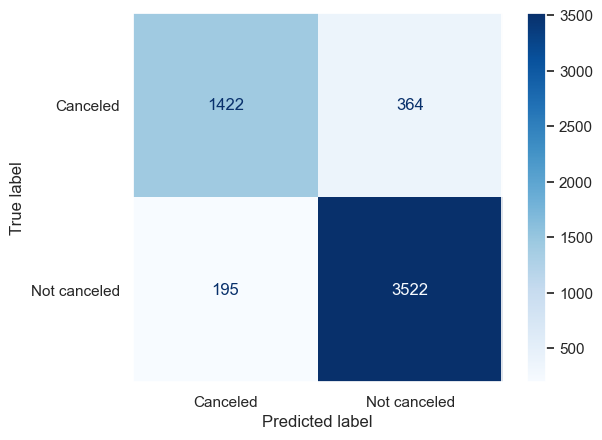

In [56]:
confusion_matrix_forest = confusion_matrix(y_test, pred_forest)
cm_display_forest = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_forest, display_labels = ['Canceled', 'Not canceled'])
cm_display_forest.plot(cmap=plt.cm.Blues)
plt.grid(False)

plt.savefig('forestcm.png', bbox_inches='tight', dpi=300)
plt.show()

#### Xgboost

In [57]:
boost = XGBClassifier(random_state=23)
boost.fit(scaledX_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=23, ...)

In [58]:
pred_boost = boost.predict(scaledX_test)
pred_boost

array([1, 1, 0, ..., 1, 1, 1])

In [59]:
print(f'The f1_score of the xgboost model is {f1_score(y_test, pred_boost)}')
f1scores.append(f1_score(y_test, pred_boost))

The f1_score of the xgboost model is 0.9206223628691983


In [60]:
print(classification_report(y_test, pred_boost))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82      1786
           1       0.90      0.94      0.92      3717

    accuracy                           0.89      5503
   macro avg       0.88      0.86      0.87      5503
weighted avg       0.89      0.89      0.89      5503



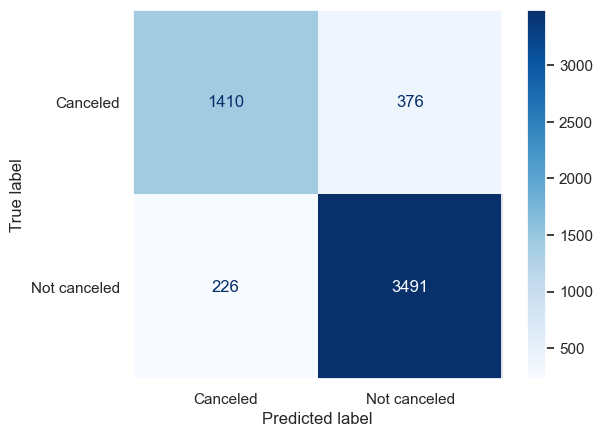

In [61]:
confusion_matrix_boost = confusion_matrix(y_test, pred_boost)
cm_display_boost = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_boost, display_labels = ['Canceled', 'Not canceled'])
cm_display_boost.plot(cmap=plt.cm.Blues)
plt.grid(False)

plt.savefig('boostcm.png', bbox_inches='tight', dpi=300)
plt.show()

### Hyperparameter Tuning

In [62]:
param_grid = {'n_estimators':[100, 300, 500], 'max_depth':[5, 10, 15], 'max_features':['sqrt', 'log2', None]}

In [63]:
tuned_forest = RandomForestClassifier(max_depth=15, max_features=None, n_estimators=500)
tuned_forest.fit(scaledX_train, y_train)


RandomForestClassifier(max_depth=15, max_features=None, n_estimators=500)

In [64]:
pred_tunedforest = tuned_forest.predict(scaledX_test)

In [65]:
print(f'The f1_score of the random forest model is {f1_score(y_test, pred_tunedforest)}')

The f1_score of the random forest model is 0.9227722772277228


In [66]:
print(f'The accuracy score of the random forest model is {accuracy_score(y_test, pred_tunedforest)}')

The accuracy score of the random forest model is 0.8936943485371616


In [67]:
print(classification_report(y_test, pred_tunedforest))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1786
           1       0.91      0.94      0.92      3717

    accuracy                           0.89      5503
   macro avg       0.89      0.87      0.88      5503
weighted avg       0.89      0.89      0.89      5503



In [68]:
models = ['Logistic Regression', 'Random Forest', 'Xgboost']
print(f1scores)

[0.8552327076369248, 0.9264763908983297, 0.9206223628691983]


In [69]:
models_scores = list(zip(models, f1scores))
evaluation = pd.DataFrame(models_scores, columns=['Model', 'F1score'])
evaluation

,Model,F1score
0,Logistic Regression,0.855233
1,Random Forest,0.926476
2,Xgboost,0.920622


### Feature Importance

In [70]:
importance = list(forest.feature_importances_)
importance

[0.015077690132068746,
 0.0050441706406355955,
 0.02871909620809686,
 0.03667619568204688,
 0.01792601210444481,
 0.006383447842510432,
 0.015432854876102848,
 0.314214637851429,
 0.026333181633290063,
 0.08073360575383053,
 0.08622008101931691,
 0.05221323304241323,
 0.002066866305676169,
 0.00020286945388432078,
 0.0023564507785689484,
 0.1499177104172239,
 0.09736223194905533,
 0.019165710294950244,
 0.04395395401445518]

In [71]:
feature = list(X_train.columns)
feature_importance = list(zip(feature, importance))
feature_importance_df = pd.DataFrame(feature_importance, columns=['Feature', 'Importance']).sort_values(ascending = False, by= 'Importance')
feature_importance_df

,Feature,Importance
7,lead_time,0.314215
15,avg_price_per_room,0.149918
16,no_of_special_requests,0.097362
10,arrival_date,0.086220
9,arrival_month,0.080734
11,market_segment_type,0.052213
18,no_of_days_booked,0.043954
3,no_of_week_nights,0.036676
2,no_of_weekend_nights,0.028719
8,arrival_year,0.026333


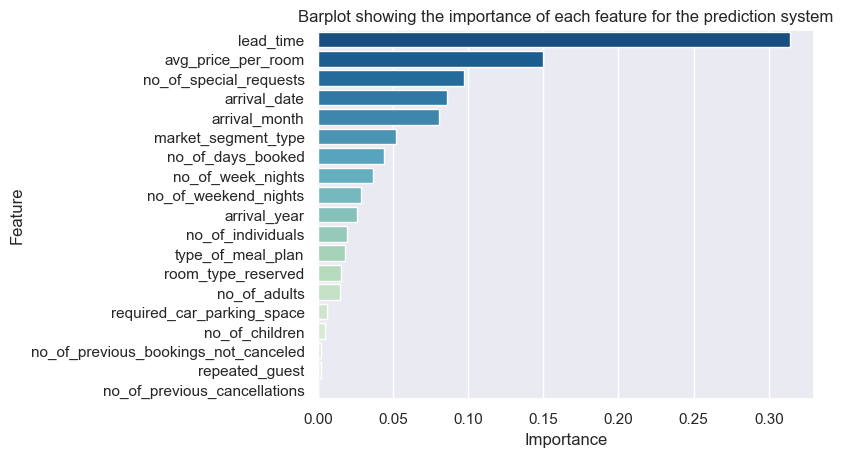

In [72]:
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='GnBu_r')
plt.title('Barplot showing the importance of each feature for the prediction system')


plt.savefig('importance.png', bbox_inches='tight', dpi=300)
plt.show()

### Model Deployment

In [73]:
import pickle


# Specify the file path where you want to save the model
save_path = "model.pkl"

# Save the model as a pickle file
with open(save_path, 'wb') as file:
    pickle.dump(forest, file)

print("Model saved as pickle file.")


Model saved as pickle file.


In [74]:


# Specify the file path where you want to save the scaler
save_path = "scaler.pkl"

# Save the scaler as a pickle file
with open(save_path, 'wb') as file:
    pickle.dump(scaler, file)

print("Scaler saved as pickle file.")


Scaler saved as pickle file.
